In [25]:
import numpy as np
import matplotlib.pyplot as plt
import plotly as py

In [26]:
S = 100

In [27]:
# load data
data = np.loadtxt('data.csv', delimiter=',').T
data

array([[ 7.10360582,  2.02183974, 97.86183422, ..., 18.16168445,
        25.26418333, 81.43604307],
       [ 8.71292997, 83.26198455, 79.91585642, ..., 99.2136903 ,
        25.71676702, 22.12416438],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         1.        ,  1.        ]])

In [28]:
data.shape

(3, 500)

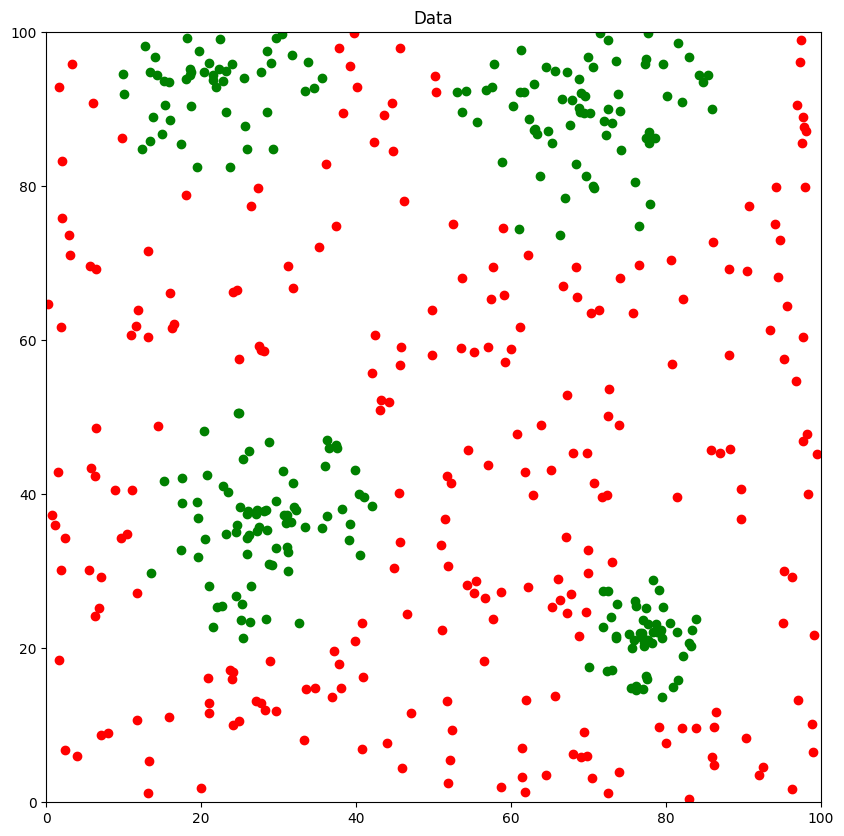

In [29]:
# Plot Data 2D
def plot_data_2d(data_: np.ndarray) -> None:
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(0, S)
    ax.set_ylim(0, S)

    ax.set_title('Data')

    ax.plot(data_[0, data_[2, :] == 0], data_[1, data_[2, :] == 0], 'o', color='red')
    ax.plot(data_[0, data_[2, :] == 1], data_[1, data_[2, :] == 1], 'o', color='green')
    plt.show()


plot_data_2d(data)

In [30]:
# Plot Data 2D (plotly)
def plot_data_2d_py(data_: np.ndarray) -> None:
    fig = py.graph_objs.Figure()
    fig.add_scatter(x=data_[0, data_[2, :] == 0], y=data_[1, data_[2, :] == 0], mode='markers', marker_color='red',
                    name='Class 0')
    fig.add_scatter(x=data_[0, data_[2, :] == 1], y=data_[1, data_[2, :] == 1], mode='markers', marker_color='green',
                    name='Class 1')

    fig.update_layout(
        title='Data',
        xaxis_title='x',
        yaxis_title='y',
        xaxis=dict(range=[0, S]),
        yaxis=dict(range=[0, S]),
        width=1000,
        height=1000
    )

    fig.show()


plot_data_2d_py(data)

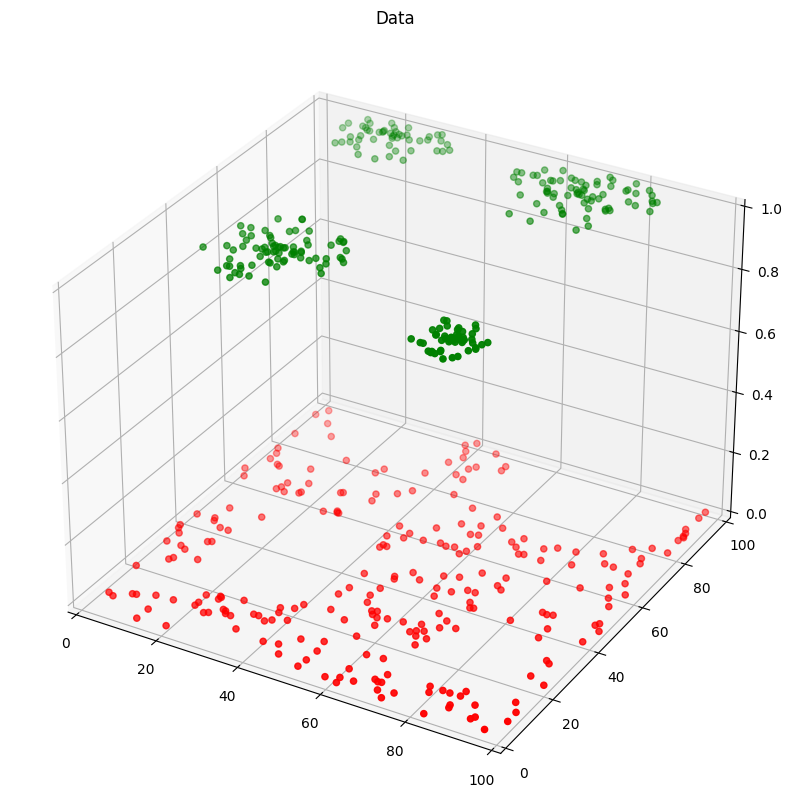

In [31]:
# Plot Data 3D
def plot_data_3d(data_: np.ndarray) -> None:
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim(0, S)
    ax.set_ylim(0, S)
    ax.set_zlim(0, 1)

    ax.set_title('Data')

    ax.scatter(data_[0, data_[2, :] == 0], data_[1, data_[2, :] == 0], data_[2, data_[2, :] == 0], c='red', marker='o')
    ax.scatter(data_[0, data_[2, :] == 1], data_[1, data_[2, :] == 1], data_[2, data_[2, :] == 1], c='green',
               marker='o')
    plt.show()


plot_data_3d(data)

In [32]:
# Plot Data 3D (plotly)
def plot_data_3d_py(data_: np.ndarray) -> None:
    fig = py.graph_objs.Figure()
    fig.add_scatter3d(x=data_[0, data_[2, :] == 0], y=data_[1, data_[2, :] == 0], z=data_[2, data_[2, :] == 0],
                      mode='markers', marker_color='red', name='Class 0')
    fig.add_scatter3d(x=data_[0, data_[2, :] == 1], y=data_[1, data_[2, :] == 1], z=data_[2, data_[2, :] == 1],
                      mode='markers', marker_color='green', name='Class 1')

    fig.update_layout(
        title='Data',
        scene=dict(
            xaxis_title='x',
            yaxis_title='y',
            zaxis_title='z',
            xaxis=dict(range=[0, S]),
            yaxis=dict(range=[0, S]),
            zaxis=dict(range=[0, 1]),
        ),
        width=1000,
        height=1000
    )

    fig.show()


plot_data_3d_py(data)